In [33]:
#importing Libraries :)

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, UpSampling1D, Dense, Dropout, Flatten
from tensorflow.keras.layers import Input, BatchNormalization, AveragePooling1D
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Activation,Layer,Lambda

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [34]:
#load dataset

dataset=pd.read_csv("breastcancerdataset.csv")

In [35]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
#Don't need id column and Unnamed:32 column
dataset=dataset.drop(["id","Unnamed: 32"],axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
dataset.shape

(569, 31)

In [38]:
#check for null values
pd.isnull(dataset).sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [39]:
y = dataset.iloc[:,0].values
x = dataset.drop(["diagnosis"],axis=1)

In [40]:
x.to_numpy()

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [41]:
x.shape

(569, 30)

In [42]:
print(y)
#encoding Categorical Data Turning 'y' values into numeric value
from sklearn.preprocessing import LabelEncoder
labelencoder_x= LabelEncoder()
y = labelencoder_x.fit_transform(y)
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [43]:
#spliting the dataset into train and test set

x_train,x_val,y_train,y_val= train_test_split(x,y,test_size = 0.1, random_state = 0)
x_train,x_test,y_train,y_test= train_test_split(x_train,y_train,test_size = 0.1, random_state = 0)

In [44]:
min_max_scaler = preprocessing.MinMaxScaler()

x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)
x_val = min_max_scaler.fit_transform(x_val)

print(x_train.shape,x_test.shape,x_val.shape)

(460, 30) (52, 30) (57, 30)


In [45]:
x_train = x_train.reshape(460, 30,1)
x_test = x_test.reshape(52, 30,1)
x_val = x_val.reshape(57, 30,1)

In [69]:
input_data = Input(shape=(30,))
encoded = Dense(3, activation='relu', activity_regularizer = regularizers.l1(1e-6))(input_data)
#encoded = BatchNormalization()(encoded)
decoded = Dense(30, activation='sigmoid')(encoded)

In [70]:
autoencoder = Model(input_data, decoded)
opt = keras.optimizers.Adam(lr=0.01)
autoencoder.compile(loss="mse",optimizer='Adam')
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 93        
_________________________________________________________________
dense_21 (Dense)             (None, 30)                120       
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = autoencoder.fit(x_train, x_train,epochs=500,shuffle=True,validation_data=(x_val, x_val))

Epoch 1/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1066 - val_loss: 0.0928
Epoch 2/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1006 - val_loss: 0.0885
Epoch 3/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0950 - val_loss: 0.0851
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0898 - val_loss: 0.0827
Epoch 5/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0849 - val_loss: 0.0810
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0802 - val_loss: 0.0800
Epoch 7/500
15/15 [==============================] - 0s 5ms/step - loss: 0.0758 - val_loss: 0.0795
Epoch 8/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0717 - val_loss: 0.0791
Epoch 9/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0677 - val_loss: 0.0790
Epoch 10/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0640 - val_loss: 0.0789
Epoch 11

Epoch 83/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0122 - val_loss: 0.0388
Epoch 84/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.0382
Epoch 85/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.0382
Epoch 86/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0120 - val_loss: 0.0382
Epoch 87/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0120 - val_loss: 0.0380
Epoch 88/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.0377
Epoch 89/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.0376
Epoch 90/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0118 - val_loss: 0.0375
Epoch 91/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0118 - val_loss: 0.0372
Epoch 92/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.0370


15/15 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0309
Epoch 165/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0099 - val_loss: 0.0309
Epoch 166/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0308
Epoch 167/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0307
Epoch 168/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0306
Epoch 169/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0306
Epoch 170/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0305
Epoch 171/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0304
Epoch 172/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0303
Epoch 173/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0302
Epoc

15/15 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0251
Epoch 246/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0250
Epoch 247/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0249
Epoch 248/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0248
Epoch 249/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0248
Epoch 250/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0248
Epoch 251/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0247
Epoch 252/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0246
Epoch 253/500
15/15 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0245
Epoch 254/500
15/15 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0245
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.0210
Epoch 327/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0066 - val_loss: 0.0209
Epoch 328/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.0210
Epoch 329/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.0209
Epoch 330/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0209
Epoch 331/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0208
Epoch 332/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0208
Epoch 333/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0207
Epoch 334/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0207
Epoch 335/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0207
Epoc

15/15 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0193
Epoch 408/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0193
Epoch 409/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0192
Epoch 410/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0192
Epoch 411/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0192
Epoch 412/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0193
Epoch 413/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0192
Epoch 414/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0192
Epoch 415/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0192
Epoch 416/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0191
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 0.0190
Epoch 489/500
15/15 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 0.0186
Epoch 490/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0187
Epoch 491/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0189
Epoch 492/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0188
Epoch 493/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0189
Epoch 494/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0187
Epoch 495/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0189
Epoch 496/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0187
Epoch 497/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0188
Epoc

In [71]:
evaluation = autoencoder.evaluate(x_test, x_test)

print("Loss:",evaluation)

2/2 [==============================] - 0s 3ms/step - loss: 0.0842
Loss: 0.08418301492929459


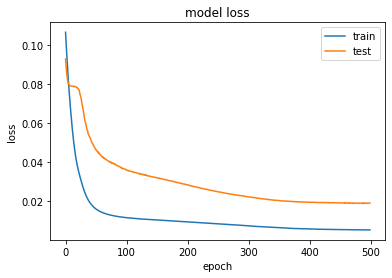

In [72]:
# Plot training loss and validation split loss over the epochs
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('ConvAE_model_loss.png')
plt.show()

In [73]:
autoencoder.evaluate(x_test, x_test)
#model.save('si_autoencoder.model')
data = autoencoder.predict(x_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.0842


In [74]:
encoder = Model(input_data, encoded)
latent_vector_train = encoder.predict(x_train)
latent_vector = encoder.predict(x_test)

In [75]:
# Dimentionality reduction for 30 features to 3

x_test.shape

(52, 30, 1)

In [76]:
latent_vector.shape

(52, 3)

In [77]:
latent_vector = latent_vector.reshape(52, 3)
latent_vector_train = latent_vector_train.reshape(460, 3)

In [78]:
y_test

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1])

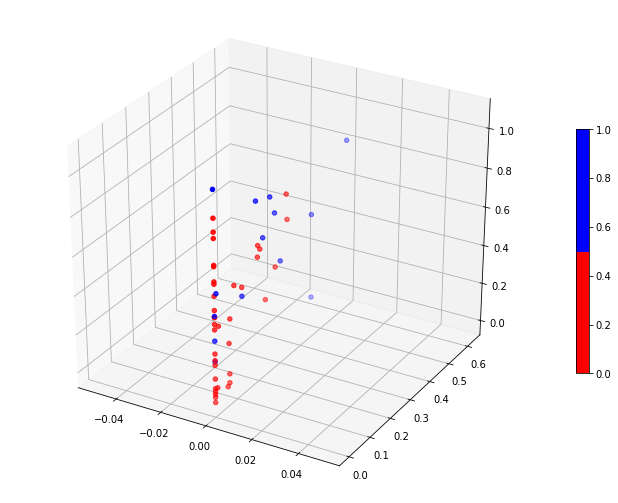

In [79]:
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d
colors=['red','blue']
plt.figure(figsize =(12, 9))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(latent_vector[:, 0], latent_vector[:, 1], latent_vector[:, 2], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
# Add a color bar which maps values to colors.
cb = plt.colorbar(surf, shrink=0.5, aspect=20)
plt.savefig('ConvAE_3d.png')
plt.show()

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knnscores = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(latent_vector_train, y_train)
    k = knn.score(latent_vector,y_test)
    knnscores.append(k)

s = np.array(knnscores)
result = np.where(s == s.max())
print('Knn Score : ',s.max(),'and k : ', result[0])

Knn Score :  0.7115384615384616 and k :  [7]


In [81]:
y_pred=knn.predict(latent_vector)

In [82]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(latent_vector)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Mean Absolute Error: 0.34615384615384615
Mean Squared Error: 0.34615384615384615
Root Mean Squared Error: 0.5883484054145521
[[24 14]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        38
           1       0.42      0.71      0.53        14

    accuracy                           0.65        52
   macro avg       0.64      0.67      0.63        52
weighted avg       0.74      0.65      0.67        52

